### Example
$$
\begin{array}{rrl}
f(x)  = & \inf_y & x^2 + y\\
&\text{s.t.} & 1\leq y\leq2\\
&& y-x-1\leq 0\\
&& x-y-1\leq 0
\end{array}
$$

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import gurobipy as gp

In [63]:
def f(xx):
    x = xx[0]
    m = gp.Model()
    m.setParam('LogToConsole', 0)
    y = m.addVar(lb=0, ub=1, name='y')
    m.addConstr(y -x-1<=0)
    m.addConstr(x -y-1<=0)

    obj = y +2*x**2
    m.setObjective(obj, sense=gp.GRB.MINIMIZE)
    m.optimize()
    return obj.getValue()
    
    

In [64]:
f([2])

9.0

In [65]:
x = np.linspace(-1,1,100)
y = [f([xx]) for xx in x]

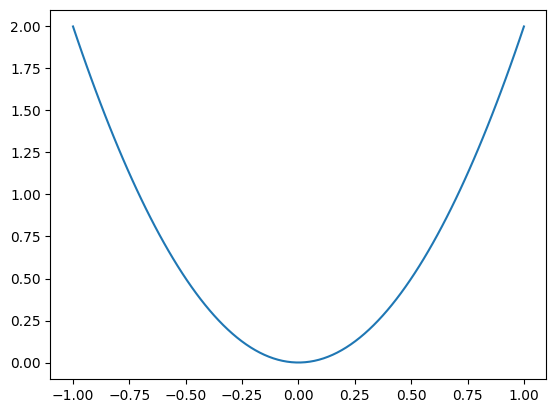

In [66]:
plt.plot(x,y)

### computing the subgradient
### Example
$$
\begin{array}{rrl}
F(x_1,x_2,x_3)  = & \inf_y &  t\\
&\text{s.t.} & 1\leq y\leq2\\
&& y-1\leq x_1\\
&& -y-1\leq x_2\\
&& l^2+y\leq t\\
&& -l <=x_3
\end{array}
$$

$$
f(x) = F(Ax),\quad\text{where } A = [I,-I,-I]^T
$$

In [123]:
def f(xx):
    x = xx[0]
    m = gp.Model()
    m.setParam('LogToConsole', 0)
    m.setParam('QCPDual', 1)

    y = m.addVar(lb=1, ub=2, name='y')
    t = m.addVar(lb=-10000, name='t')
    l = m.addVar(lb=-10000, name='l')


    con1=m.addConstr(y -x-1<=0)
    con2 = m.addConstr(x -y-1<=0)
    m.addConstr(l*l +y-t<=0)
    con3 = m.addConstr(-l +x<=0)



    obj = t
    m.setObjective(obj, sense=gp.GRB.MINIMIZE)
    m.optimize()
    #print(y.X)
    subgrad = con1.Pi-con2.Pi-con3.Pi
    #print(con1.Pi, con2.Pi,con3.Pi)
    return t.X, subgrad
    
    

In [124]:
f([3])

(11.0, 7.000000111255706)

In [126]:
x = np.linspace(0,3,100)
y = [f([xx])[0] for xx in x]

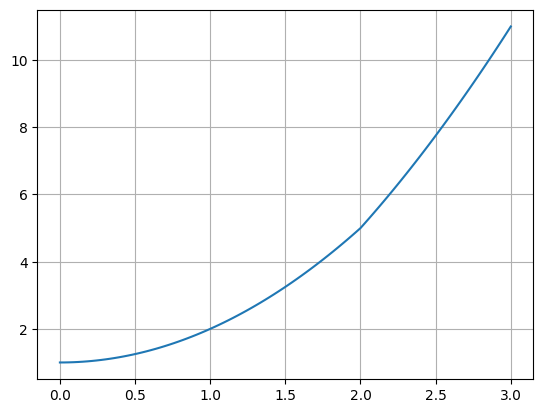

In [127]:
plt.plot(x,y)
plt.grid()

In [121]:
f([2])

1.0
-0.0 -0.0 -4.000000132645286


(5.0, 4.000000132645286)

In [122]:
2.5**2+1.5

7.75

In [131]:
x = np.linspace(0,3,200)
y = [f([xx])[1] for xx in x]

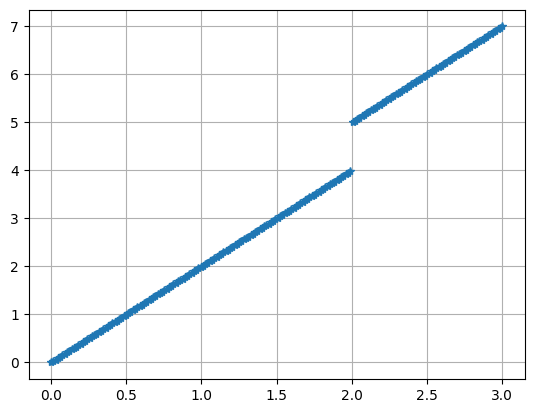

In [132]:
plt.plot(x,y,'*')
plt.grid()